In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk

1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column


In [3]:
titanic_df=pd.read_csv('/content/titanic_dataset.csv' ,index_col='PassengerId')
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


3. Check the basic details of the dataset

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4. Fill in all the missing values present in all the columns in the dataset

In [7]:
titanic_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

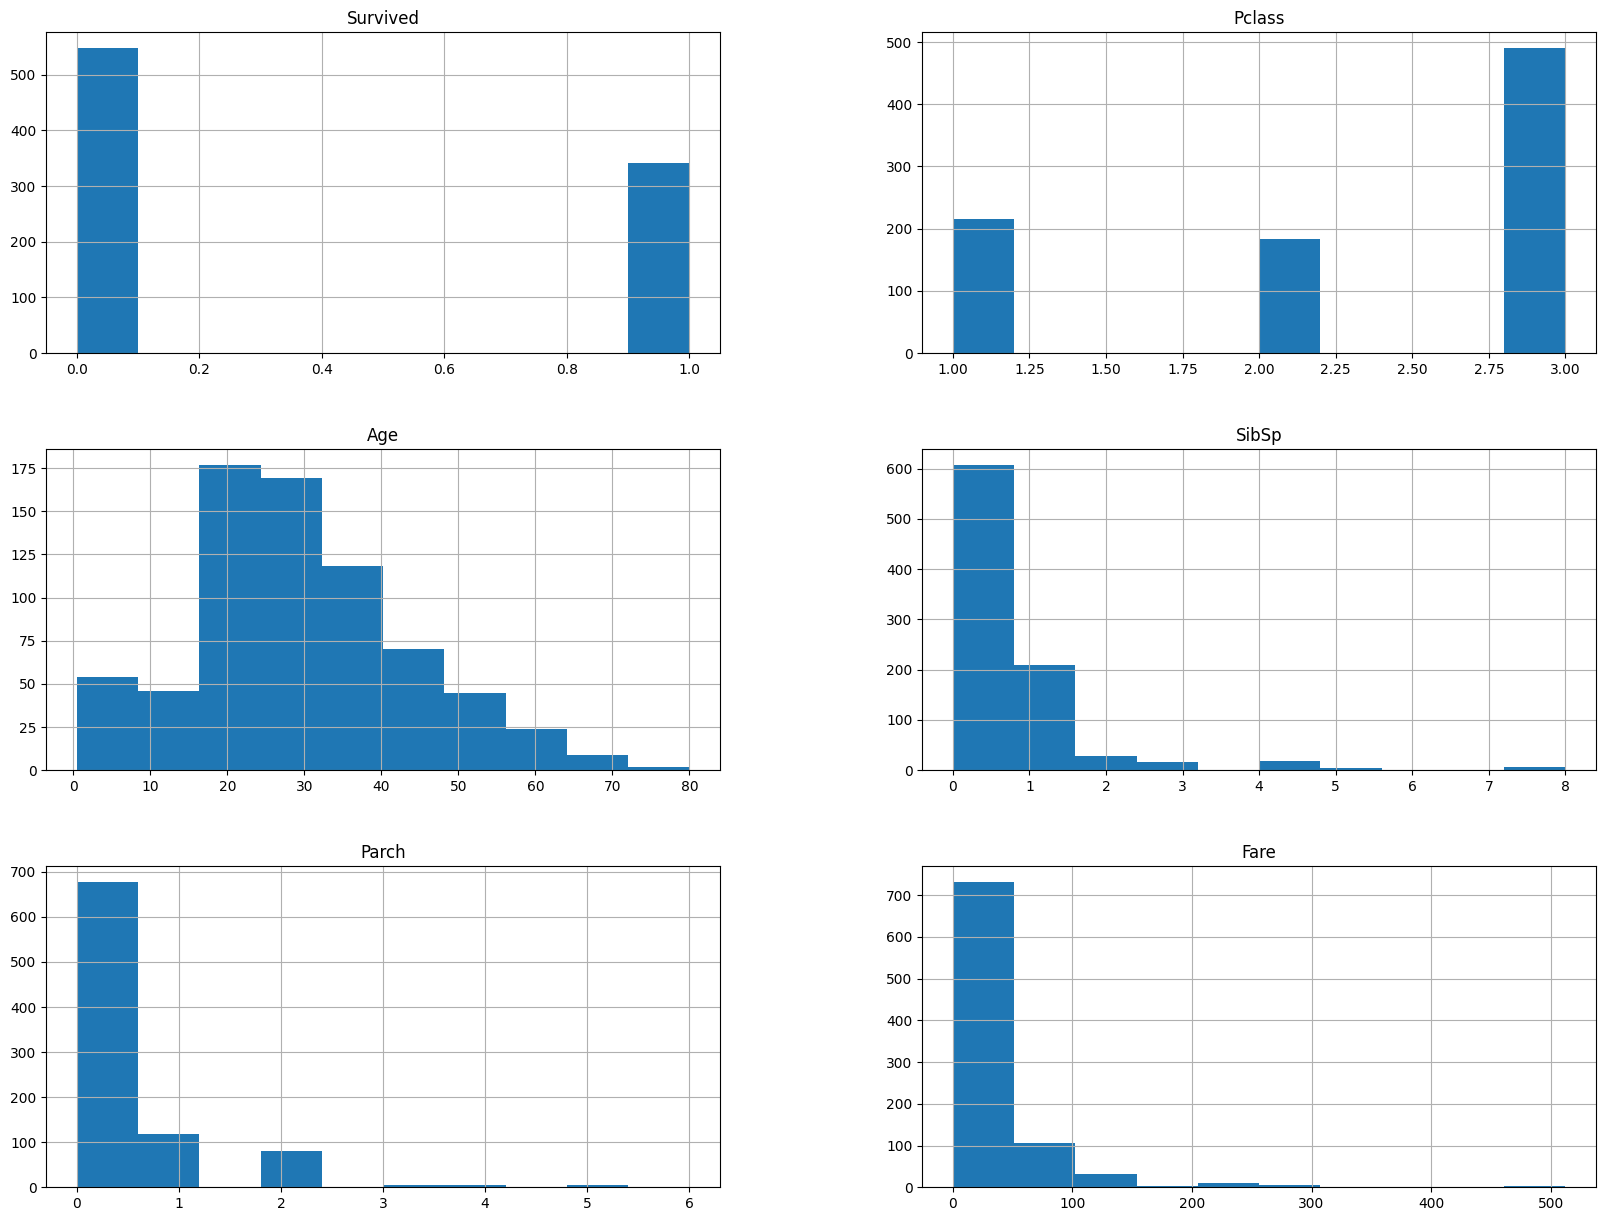

In [8]:
#frequency graph

freqgraph = titanic_df.select_dtypes(include = ['int64','float64'])
freqgraph.hist(figsize = (20, 15))

In [9]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#filling missing values

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Cabin'] = titanic_df['Cabin'].fillna(titanic_df['Cabin'].mode()[0])
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])




In [11]:
titanic_df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset

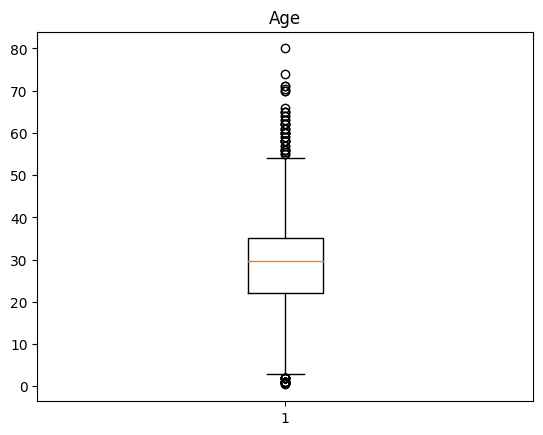

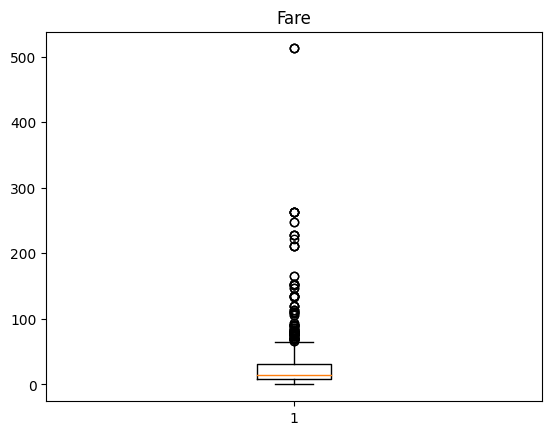

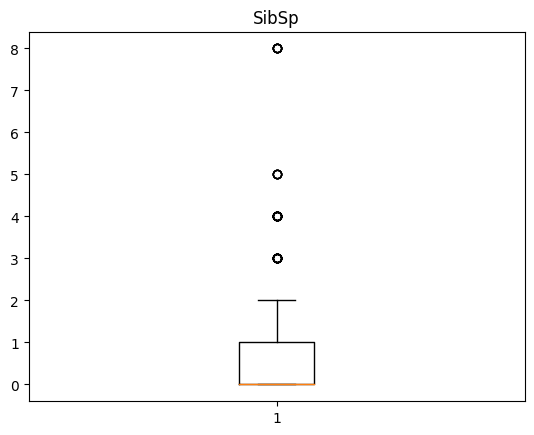

In [15]:
#finding outliers
num_columns = ['Age', 'Fare', 'SibSp']
for i in num_columns:
  plt.figure()
  plt.boxplot(titanic_df[i])
  plt.title(i)
  plt.show()


In [36]:
#handling outliers
from scipy import stats
columns_with_outliers = ['Age', 'Fare', 'SibSp']
for i in columns_with_outliers:
    z_scores = stats.zscore(titanic_df[i])
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    df1 = titanic_df[filtered_entries]







In [37]:
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  702 non-null    int64  
 1   Pclass    702 non-null    int64  
 2   Name      702 non-null    object 
 3   Sex       702 non-null    object 
 4   Age       702 non-null    float64
 5   SibSp     702 non-null    int64  
 6   Parch     702 non-null    int64  
 7   Ticket    702 non-null    object 
 8   Fare      702 non-null    float64
 9   Cabin     702 non-null    object 
 10  Embarked  702 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 65.8+ KB


6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [40]:
num_columns = df1.select_dtypes(include=['float64', 'int64']).columns
x = df1[num_columns].drop('Survived', axis=1)
minmax = sk.MinMaxScaler(feature_range = (0,1))
x_minmax = minmax.fit_transform(x)
x_minmax = pd.DataFrame(x_minmax)
x_minmax.describe()

,0,1,2,3,4
count,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.734330,0.465837,0.225071,0.045347,0.278703
std,0.367555,0.177777,0.417927,0.124797,0.215480
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.360818,0.000000,0.000000,0.132313
50%,1.000000,0.467867,0.000000,0.000000,0.176768
75%,1.000000,0.536593,0.000000,0.000000,0.406566
max,1.000000,1.000000,1.000000,1.000000,1.000000


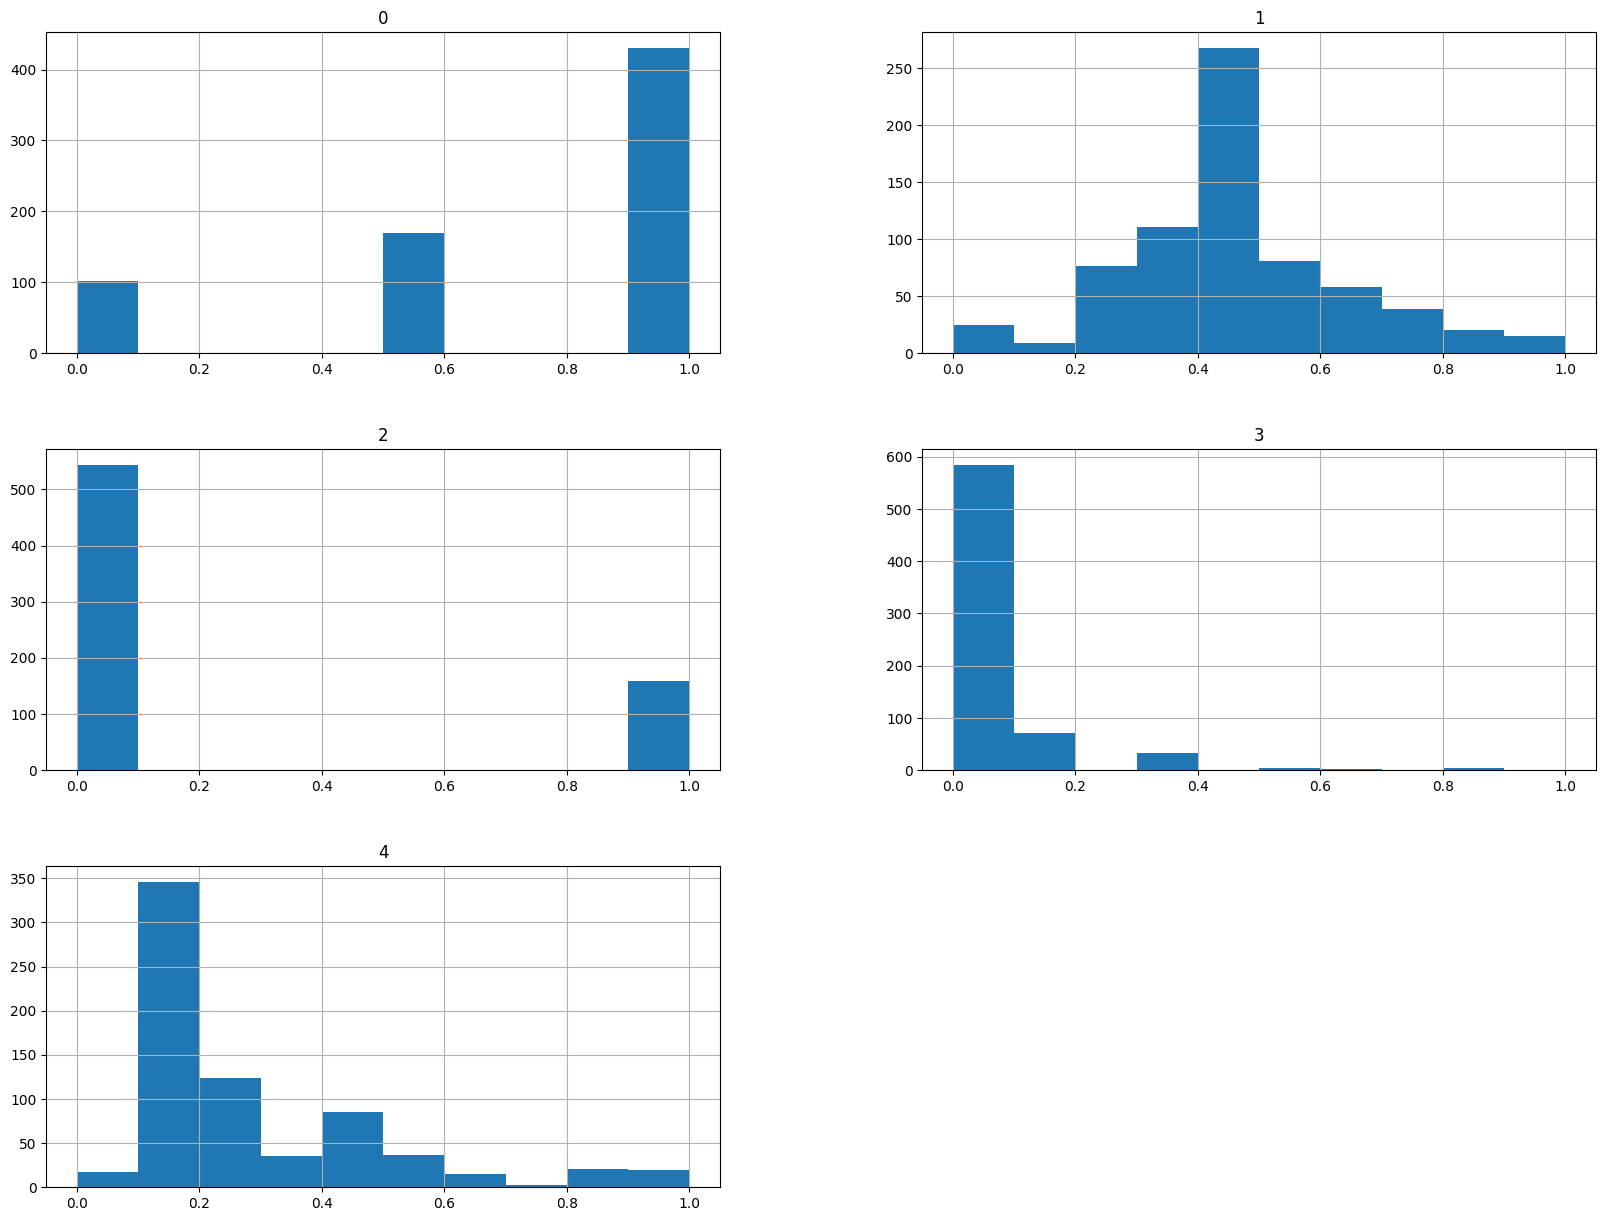

In [41]:
x_minmax.hist(figsize=(20,15))
plt.show()